## Example of how to use BMTOOL single cell analysis with neuron hoc files
### First we make sure our modfiles are compiled

In [13]:
import os

# if already compiled then lets delete the folder and force a recompile
if os.path.isdir('modfiles/x86_64'):
    os.system("rm -rf modfiles/x86_64 ")
# compile the mod files
if not os.path.isdir("modfiles/x86_64"):
    os.chdir('modfiles')
    os.system("nrnivmodl")
    os.chdir("..")

/home/gjgpb9/miniconda3/envs/bmtk/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating AMPA_NMDA_STP.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/Neuron_hoc/modfiles/x86_64/AMPA_NMDA_STP.c
Translating cal2.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/Neuron_hoc/modfiles/x86_64/cal2.c
Translating cadad.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/Neuron_hoc/modfiles/x86_64/cadad.c
Thread Safe
Thread Safe
Thread Safe
Translating can_mig.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/Neuron_hoc/modfiles/x86_64/can_mig.c
Thread Safe
Translating exp2syn_stp.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/Neuron_hoc/modfiles/x86_64/exp2syn_stp.c
Translating GABA_A_STP.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/Neuron_hoc/modfiles/x86_64/

/home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/Neuron_hoc/modfiles
Mod files: "./AMPA_NMDA_STP.mod" "./cadad.mod" "./cal2.mod" "./can_mig.mod" "./exp2syn_stp.mod" "./GABA_A_STP.mod" "./gap.mod" "./Gfluct.mod" "./h_kole.mod" "./imCA3.mod" "./kap_BS.mod" "./kBK.mod" "./kdmc_BS.mod" "./kdr_BS.mod" "./kdrCA3.mod" "./kdrinter.mod" "./leak.mod" "./nainter.mod" "./napCA3.mod" "./natCA3.mod" "./nax_BS.mod" "./vecevent_coreneuron.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../AMPA_NMDA_STP.mod
 -> NMODL ../cadad.mod
 -> NMODL ../cal2.mod
 -> NMODL ../can_mig.mod
 -> NMODL ../exp2syn_stp.mod
 -> NMODL ../GABA_A_STP.mod
 -> NMODL ../gap.mod
 -> NMODL ../Gfluct.mod
 -> NMODL ../h_kole.mod
 -> NMODL ../imCA3.mod
 -> NMODL ../kap_BS.mod
 -> NMODL ../kBK.mod
 -> NMODL ../kdmc_BS.mod
 -> NMODL ../kdr_BS.mod
 -> NMODL ../kdrCA3.mod
 -> NMODL ../kdrinter.mod
 -> NMODL ../leak.mod
 -> NMODL ../nainter.mod
 -> NMODL ../napCA3.mod
 -> NMODL ../natCA3.mod


### Then we need to init our profiler this will make sure the templates and mechanisms are loaded

In [14]:
import numpy as np
from neuron import h
import matplotlib.pyplot as plt
from bmtool.singlecell import Profiler, Passive, CurrentClamp, FI, ZAP, run_and_plot
%matplotlib inline

template_dir = '.' #templates are in templates.hoc in this working dir
mechanism_dir = 'modfiles'

profiler = Profiler(template_dir=template_dir, mechanism_dir=mechanism_dir, dt = 0.05)

Mechanisms already loaded from path: modfiles.  Aborting.


### Then we will setup our settings for each function in the singlecell module. These setting may change depending on cell type and the biology data you have to constain off of. For now some basic ones are used for looking at principle cells 

In [15]:
noise = False
post_init_function = 'insert_mechs(0)' if noise else None

basic_settings = {
    'Passive': {
        'celsius': 26.,
        'kwargs': {
            'inj_amp': -50.,
            'inj_delay': 1500.,
            'inj_dur': 1000.,
            'tstop': 2500.,
            'method': 'exp2' # can be exp2, exp or simple
        }
    },
    'CurrentClamp': {
        'celsius': 34.,
        'kwargs': {
            'post_init_function': post_init_function,
            'inj_amp': 350.,
            'inj_delay': 1500.,
            'inj_dur': 1000.,
            'tstop': 3000.,
            'threshold': 0.
        }
    },
    'ZAP': {
        'celsius': 34.,
        'kwargs': {
            'post_init_function': post_init_function,
            'inj_amp': 100.,
            'inj_delay': 1000.,
            'inj_dur': 15000.,
            'tstop': 15500.,
            'fstart': 0.,
            'fend': 15.,
            'chirp_type': 'linear'
        }
    },
    'FI': {
        'celsius': 34.,
        'kwargs': {
            'post_init_function': post_init_function,
            'i_start': 0.,
            'i_stop': 2000.,
            'i_increment': 100.,
            'tstart': 1500.
        }
    }
}

Cell = 'CP_Cell'

### Passive Properties

In [16]:
proc = basic_settings['Passive']
h.celsius = proc['celsius']
sim = Passive(Cell, **proc['kwargs'])
title = 'Passive Cell Current Injection'
xlabel = 'Time (ms)'
ylabel = 'Membrane Potential (mV)'

Injection location: CP_Cell[23].soma[0](0.5)
Recording: CP_Cell[23].soma[0](0.5)._ref_v


### we will have different plots for the different methods 

Running simulation for passive properties...

V Rest: -67.74 (mV)
Resistance: 86.03 (MOhms)
Membrane time constant: 37.58 (ms)

V_rest Calculation: Voltage taken at time 1500.0 (ms) is
-67.74 (mV)

R_in Calculation: dV/dI = (v_final-v_rest)/(i_final-i_start)
(-72.04 - (-67.74)) / (-0.05 - 0)
4.30 (mV) / 0.05 (nA) = 86.03 (MOhms)

Tau Calculation: Fit a double exponential curve to the membrane potential response
f(t) = a0 + a1*exp(-t/tau1) + a2*exp(-t/tau2)
Constrained by initial value: f(0) = a0 + a1 + a2 = v_rest
Fit parameters: (a0, a1, a2, tau1, tau2) = (-72.03, -0.48, 4.78, 37.58, 9.63)
Membrane time constant is determined from the slowest exponential term: 37.58 (ms)

Sag potential: v_sag = v_peak - v_final = -0.11 (mV)
Normalized sag potential: v_sag / (v_peak - v_rest) = 0.025



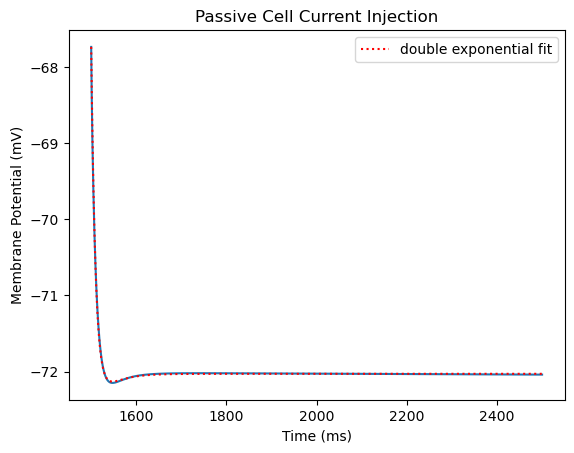

In [17]:
if sim.method =='exp2':
    X, Y = run_and_plot(sim, title, xlabel, ylabel, plot_injection_only=True)
    plt.gca().plot(*sim.double_exponential_fit(), 'r:', label='double exponential fit')
    plt.legend()
elif sim.method =='exp':
    X, Y = run_and_plot(sim, title, xlabel, ylabel, plot_injection_only=True)
    plt.gca().plot(*sim.single_exponential_fit(), 'r:', label='single exponential fit')
    plt.legend()
else:
    X, Y = run_and_plot(sim, title, xlabel, ylabel, plot_injection_only=True)
plt.show()

### Current Injection

In [18]:
proc = basic_settings['CurrentClamp']
h.celsius = proc['celsius']
sim2 = CurrentClamp(Cell, **proc['kwargs'])
title = 'Current Injection'
xlabel = 'Time (ms)'
ylabel = 'Membrane Potential (mV)'

Injection location: CP_Cell[24].soma[0](0.5)
Recording: CP_Cell[24].soma[0](0.5)._ref_v


Current clamp simulation running...

Number of spikes: 28



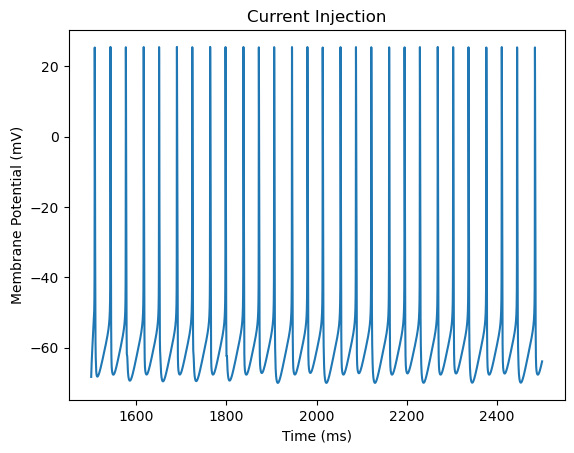

In [19]:
X, Y = run_and_plot(sim2, title, xlabel, ylabel, plot_injection_only=True)
plt.show()

### Impedance Amplitude Profile (ZAP)

In [20]:
proc = basic_settings['ZAP']
h.celsius = proc['celsius']
sim3 = ZAP(Cell, **proc['kwargs'])
title = 'ZAP Response'
xlabel = 'Time (ms)'
ylabel = 'Membrane Potential (mV)'

Injection location: CP_Cell[25].soma[0](0.5)
Recording: CP_Cell[25].soma[0](0.5)._ref_v


ZAP current simulation running...

Chirp current injection with frequency changing from 0 to 15 Hz over 15 seconds
Impedance is calculated as the ratio of FFT amplitude of membrane voltage to FFT amplitude of chirp current

Resonant Peak Frequency: 0.333 (Hz)


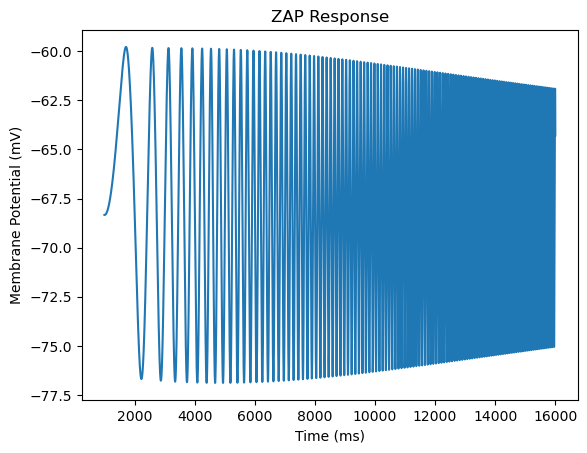

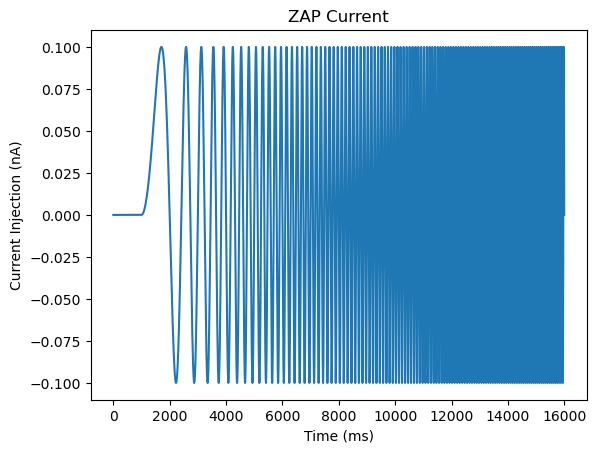

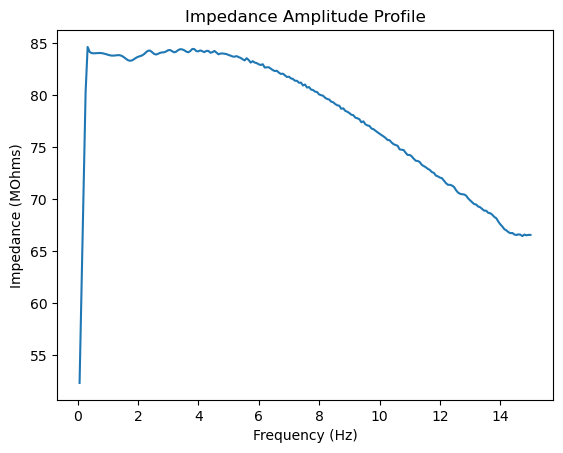

In [21]:
X, Y = run_and_plot(sim3, title, xlabel, ylabel, plot_injection_only=True)

plt.figure()
plt.plot(X, sim3.zap_vec)
plt.title('ZAP Current')
plt.xlabel('Time (ms)')
plt.ylabel('Current Injection (nA)')

plt.figure()
plt.plot(*sim3.get_impedance(smooth=9))
plt.title('Impedance Amplitude Profile')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Impedance (MOhms)')
plt.show()

### F-I Curve

In [22]:
proc = basic_settings['FI']
h.celsius = proc['celsius']
sim4 = FI(Cell, **proc['kwargs'])
title = 'FI Curve'
xlabel = 'Injection (nA)'
ylabel = '# Spikes'

Injection location: CP_Cell[45].soma[0](0.5)
Recording: CP_Cell[45].soma[0](0.5)._ref_v


Running simulations for FI curve...

Results
    Injection (nA):  number of spikes
0               0.0                 0
1               0.1                 0
2               0.2                16
3               0.3                24
4               0.4                32
5               0.5                41
6               0.6                49
7               0.7                59
8               0.8                68
9               0.9                78
10              1.0                90
11              1.1                 4
12              1.2                 3
13              1.3                 2
14              1.4                 2
15              1.5                 2
16              1.6                 2
17              1.7                 2
18              1.8                 2
19              1.9                 2



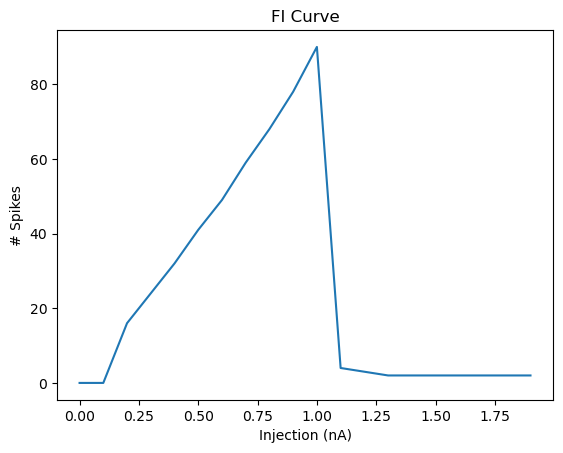

In [23]:
X, Y = run_and_plot(sim4, title, xlabel, ylabel)
plt.show()

### You can then take the output of the FI curve and find some simple properties of it

In [24]:
def find_slope(X1,X2,Y1,Y2):
    """yum yum over picnic table """
    slope = (Y2 - Y1)/(X2 - X1)
    print("Slope: " + str(slope))

def find_rheobase(X,Y):
    """Rheobase is min current to cause a spike"""
    non_zero_indices = np.nonzero(Y)[0]
    rheobase = X[non_zero_indices[0]]
    print("Rheobase: " + str(rheobase) + 'nA')

index1 = 19
index2 = 0

find_slope(X[index1],X[index2],Y[index1],X[index2])

find_rheobase(X,Y)

Slope: 1.0526315789473684
Rheobase: 0.2nA
